In [3]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
oppScrData = pd.read_excel ('/Users/sanyamkakkar/Desktop/Spring/Ml760/CS760-Project/OppScrData.xlsx')

In [5]:
def normalize_ss(data):
  return StandardScaler().fit_transform(data)

def normalize_min_max(data):
    n = data.shape[1]    
    for i in range(n-1):
      data[:,i] = (data[:,i] - np.min(data[:,i]))/(np.max(data[:,i])- np.min(data[:,i]))
    return data

def plot(y_pred, y_test):
  plt.figure()
  x = [i+1 for i in range(len(y_test))]
  plt.plot((x,x),([i for i in y_pred], [j for j in y_test]),c='green')
  plt.scatter(x, y_pred, label="predicted_y")
  plt.scatter(x, y_test, label="actual_y")
  plt.legend()
  plt.show()

def mean_absolute_error(actual, predictions):
  n = len(actual)
  return sum(abs(actual - predictions))/n

In [6]:
def get_dead_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', 'DEATH [d from CT]','Sex', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    dead_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if (not ignore) and (not pd.isna(row['DEATH [d from CT]'])):
          row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )
          dead_people_ct_data.append(row)

    dead_people_ct_data = np.array(dead_people_ct_data)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    return np.array(dead_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> number of days lost
# dead_people_ct_data[1:] -> ct_data



In [7]:
dead_people_ct_data = get_dead_people_ct_data(oppScrData)

<ipython-input-6-12190a7316c1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )


In [8]:
y = dead_people_ct_data[:,0]
# X = normalize_ss(dead_people_ct_data[:,1:])
# X = normalize_min_max(dead_people_ct_data[:,1:])
X = dead_people_ct_data[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

x_train

array([[ 112.      ,  396.8     ,  716.008   , ...,   44.135765,
        4742.468   ,   49.      ],
       [ 185.      ,  600.24866 ,  956.5189  , ...,   88.98985 ,
         750.297   ,   45.      ],
       [ 119.      ,  637.1162  ,  843.8054  , ...,   48.639385,
          13.587   ,   30.      ],
       ...,
       [ 231.      ,  315.98462 ,  875.9513  , ...,   64.26262 ,
          40.395   ,   40.      ],
       [ 104.      ,  101.74572 ,  393.135   , ...,   47.89861 ,
        7684.902   ,   55.      ],
       [ 186.      ,  536.3838  ,  823.67566 , ...,   57.230667,
         403.442   ,   63.      ]], dtype=float32)

0.081233395863205


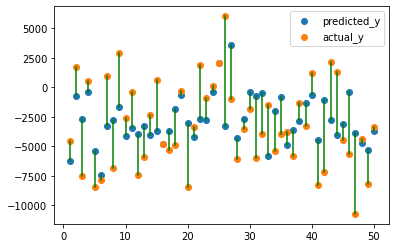

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

3697.9448046875


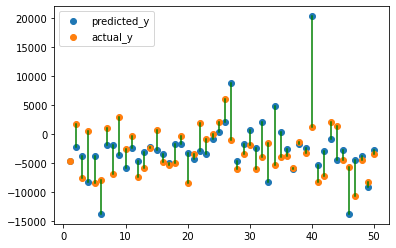

In [10]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(mean_absolute_error(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

In [11]:
def get_all_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    all_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if not ignore:
          all_people_ct_data.append(row)

    return np.array(all_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> biological age
# dead_people_ct_data[1:] -> ct_data



In [12]:
a = get_all_people_ct_data(oppScrData)
a

array([[  55.      ,  192.      ,  485.50287 , ...,   48.41319 ,
        2709.064   ,   52.      ],
       [  52.      ,  256.      ,  490.05453 , ...,   50.101334,
           0.      ,   54.      ],
       [  60.      ,  149.      ,  289.1081  , ...,   69.11585 ,
        2586.575   ,   57.      ],
       ...,
       [  63.      ,  135.      ,  822.2872  , ...,   57.78635 ,
        1115.997   ,   45.      ],
       [  55.      ,  219.      ,  418.2     , ...,   50.929787,
        3515.371   ,   44.      ],
       [  61.      ,  151.      ,   61.54359 , ...,   29.688124,
        3015.129   ,   54.      ]], dtype=float32)

In [13]:
a[0]

array([5.5000000e+01, 1.9200000e+02, 4.8550287e+02, 6.9431427e+02,
       1.8349715e+02, 3.0200858e+02, 6.0758919e-01, 1.6150124e+01,
       1.2396874e+02, 4.8413189e+01, 2.7090640e+03, 5.2000000e+01],
      dtype=float32)

In [14]:
len(a)

8878

In [15]:
days_lost = -lr.predict(poly.fit_transform(a[:,1:]))

In [16]:
a[:,0] = a[:,0]*365 + days_lost



In [17]:
X = a[:, 1:]
X2=a[:, 1:]
y = a[:,0]
y2=a[:,0]/365

In [18]:
X

from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler()

X_norm=normalize_ss(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=2)




X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(X_norm, y2, test_size=0.1, random_state=2)

#With Days

In [20]:
RFmod2 = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF2 = RandomizedSearchCV(RFmod2,param_grid2,#model and parameters
                             #number of cross validation folds
                             )


clfRF2.fit(X_train,Y_train)
params3=clfRF2.best_params_
params3



{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 6,
 'max_depth': 20,
 'bootstrap': True}

In [21]:
RFparams2={'n_estimators':[50],
          'min_samples_split':[10],
          'min_samples_leaf': [6],
           'max_features': [6],
           'max_depth': [20],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams2,refit=True)
clf.fit(X_train,Y_train)
        
clf.best_estimator_.score(X_test, Y_test)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.30561335123185795

In [22]:
y_pred=clf.predict(X_test)

In [23]:
mean_absolute_error(Y_test,y_pred)

1904.3371284124464

In [24]:
Mse = mean_squared_error(Y_test,y_pred
                         )
error=mean_absolute_error(Y_test,y_pred)
mape=mean_absolute_percentage_error(Y_test,y_pred)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 2725.48
MApe: 0.08
error 1904.3371284124464


#Years

In [27]:
RFmod = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF = RandomizedSearchCV(RFmod,param_grid,#model and parameters
                             #number of cross validation folds
                             )


clfRF.fit(X_train2,Y_train2)
params=clfRF.best_params_
params



{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 6,
 'max_depth': 20,
 'bootstrap': True}

In [28]:
RFparams4={'n_estimators':[50],
          'min_samples_split':[8],
          'min_samples_leaf': [5],
           'max_features': [6],
           'max_depth': [20],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams4,refit=True)
clf.fit(X_train2,Y_train2)
        
clf.best_estimator_.score(X_test2, Y_test2)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.2932856637373511

In [29]:
y_pred2=clf.predict(X_test2)
mean_absolute_error(Y_test2,y_pred2)

5.239793670220151

In [31]:
Mse = mean_squared_error(Y_test2,y_pred2
                         )
error=mean_absolute_error(Y_test2,y_pred2)
mape=mean_absolute_percentage_error(Y_test2,y_pred2)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 7.53
MApe: 0.08
error 5.239793670220151


In [32]:
#Neural with normalization

In [33]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,IterableDataset
from sklearn.model_selection import train_test_split

In [34]:
class CT_Dataset(Dataset):

    def __init__(self, X, y):
        self.ct_data = X
        self.age = y 

    def __len__(self):
        return len(self.ct_data)

    def __getitem__(self, idx):
        ct_data = self.ct_data[idx]     
        age = np.array(self.age[idx], dtype=np.float32)
        return torch.from_numpy(ct_data), torch.from_numpy(age)

In [35]:
a = CT_Dataset(X=X_norm_train, y = Y_norm_train)
train_set = DataLoader(a, batch_size=64, shuffle=True)

In [48]:
def build_model():
  return nn.Sequential(
    nn.Linear(11, 128),
    #nn.BatchNorm1d(128),
    nn.Linear(128,64),
    #nn.ReLU(),
    #nn.Dropout(0.25),
    #nn.Linear(128, 64),
    #nn.ReLU(),
    nn.Linear(64, 32), 
    #nn.BatchNorm1d(32),
    #nn.Softmax(dim=1),
    #nn.Linear(64, 32),
    #nn.BatchNorm1d(10),
    nn.ReLU(),
    nn.Linear(32, 1)
    )

model = build_model()

In [50]:
criterion = nn.MSELoss()

def train_model(model, train_loader, criterion, T):
  model.train()
  opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.25)
  #opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(T): 
      running_loss = 0
      for data in enumerate(train_loader):
          ct_data, actual_age = data[1][0], data[1][1]
        
          opt.zero_grad()
          predicted_age = model(ct_data)      
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()*train_loader.batch_size
          loss.backward() 
          opt.step()

  
      print("​Train Epoch: "+str(epoch) + " Loss =", str(running_loss))

  model.train(mode=False)

model = build_model()
train_model(model, train_set, criterion, T = 100)

​Train Epoch: 0 Loss = 20127788.900390625
​Train Epoch: 1 Loss = 955815.9470214844
​Train Epoch: 2 Loss = 768578.5952148438
​Train Epoch: 3 Loss = 759698.0325927734
​Train Epoch: 4 Loss = 765486.1584472656
​Train Epoch: 5 Loss = 761934.5347900391
​Train Epoch: 6 Loss = 766571.8291015625
​Train Epoch: 7 Loss = 760455.9306640625
​Train Epoch: 8 Loss = 759277.2150878906
​Train Epoch: 9 Loss = 759263.8734130859
​Train Epoch: 10 Loss = 760775.3696289062
​Train Epoch: 11 Loss = 759541.8666992188
​Train Epoch: 12 Loss = 759056.8763427734
​Train Epoch: 13 Loss = 759292.1362304688
​Train Epoch: 14 Loss = 763484.7956542969
​Train Epoch: 15 Loss = 760051.7908935547
​Train Epoch: 16 Loss = 765203.8518066406
​Train Epoch: 17 Loss = 759281.7803955078
​Train Epoch: 18 Loss = 757854.9195556641
​Train Epoch: 19 Loss = 758811.3223876953
​Train Epoch: 20 Loss = 759001.9708251953
​Train Epoch: 21 Loss = 759114.7147216797
​Train Epoch: 22 Loss = 759075.5458984375
​Train Epoch: 23 Loss = 760043.169921875
​T

In [51]:
b = CT_Dataset(X=X_norm_test, y = Y_norm_test)
test_set = DataLoader(b, batch_size=32)
test_set

In [52]:
def evaluate_model(model, test_loader, criterion):
  model.eval()
  running_loss = 0
  with torch.no_grad():
    for data in enumerate(test_loader):
          ct_data, actual_age = data[1][0], data[1][1]
          predicted_age = model(ct_data)
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()
    
  return running_loss

evaluate_model(model, test_set, criterion)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


2264.9823455810547

In [53]:
predict=model(torch.tensor(X_norm_test))

In [54]:
preict_np=predict.detach().numpy()
preict_np

array([[68.266685],
       [68.49738 ],
       [69.877975],
       [69.84785 ],
       [68.726906],
       [68.600975],
       [68.1141  ],
       [68.83414 ],
       [68.50767 ],
       [67.993645],
       [68.134926],
       [67.95849 ],
       [68.35919 ],
       [68.677864],
       [68.16316 ],
       [68.95276 ],
       [68.88214 ],
       [68.18049 ],
       [67.95803 ],
       [69.50124 ],
       [67.767204],
       [68.22627 ],
       [68.7185  ],
       [69.989075],
       [68.346214],
       [68.09062 ],
       [69.03834 ],
       [68.99293 ],
       [68.35297 ],
       [69.68249 ],
       [68.1698  ],
       [68.05821 ],
       [67.9832  ],
       [69.09907 ],
       [68.26323 ],
       [68.72985 ],
       [68.67376 ],
       [68.929565],
       [67.77068 ],
       [68.38151 ],
       [67.8096  ],
       [68.86373 ],
       [68.764565],
       [68.980705],
       [68.20691 ],
       [68.45157 ],
       [69.30612 ],
       [68.31313 ],
       [68.77773 ],
       [67.899254],


In [55]:
Mse = mean_squared_error(Y_norm_test , preict_np
                         )
error=mean_absolute_error(Y_norm_test , preict_np)
mape=mean_absolute_percentage_error(Y_norm_test , preict_np)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 9.12
MApe: 0.10
error 6.2439814
